In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
from qiskit_aer import Aer

In [2]:
circuit = QuantumCircuit(2, 1)

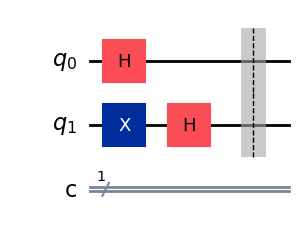

In [3]:
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.draw(output='mpl')

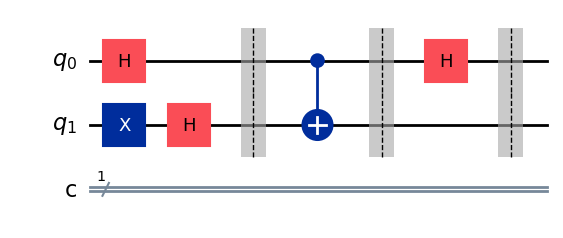

In [4]:
circuit.cx(0, 1) # function
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.draw(output='mpl')

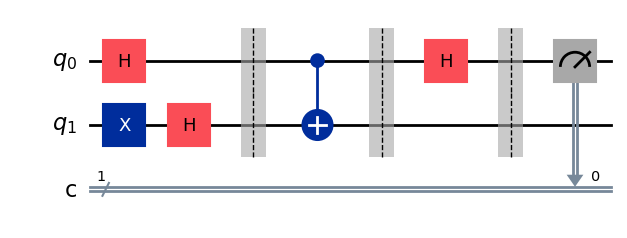

In [5]:
circuit.measure(0, 0)
circuit.draw(output='mpl')

{'1': 1024}


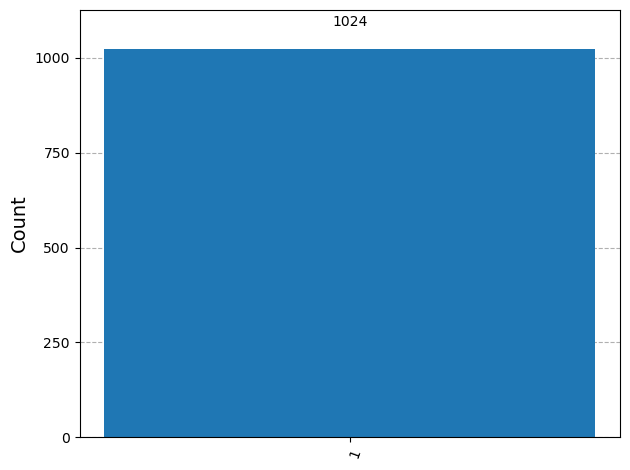

In [7]:
backend = Aer.get_backend('qasm_simulator')
result = backend.run(circuit, shots=1024).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [8]:
from qiskit_ibm_runtime import QiskitRuntimeService

with open("ibmapi.txt", "r") as f:
    token = f.read().strip()

QiskitRuntimeService.save_account(
    token=token,
    instance="Practice",
    set_as_default=True,
    overwrite=True  # Allow overwriting the existing account
)

service = QiskitRuntimeService()


In [9]:
providers = service.backends()
providers

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]

In [11]:
for backend in providers:
    name = backend.name
    qubits = backend.num_qubits
    status = backend.status().operational
    pending_jobs = backend.status().pending_jobs
    print(f"Backend: {name}, Qubits: {qubits}, Operational: {status}, Pending Jobs: {pending_jobs}")

Backend: ibm_brisbane, Qubits: 127, Operational: True, Pending Jobs: 1977
Backend: ibm_torino, Qubits: 133, Operational: True, Pending Jobs: 175


In [12]:
backend = service.backend("ibm_brisbane")

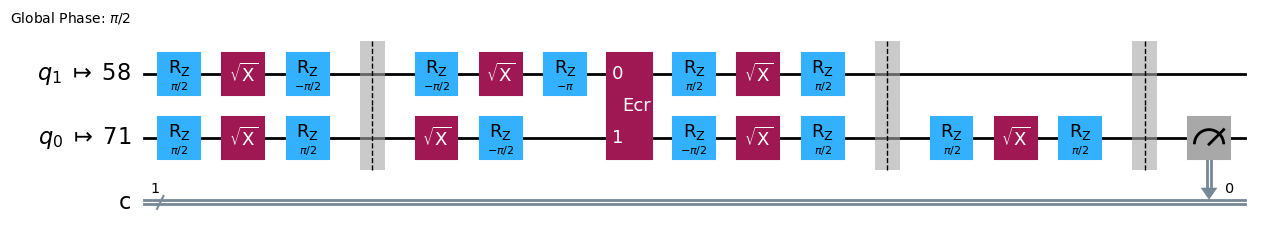

In [13]:
from qiskit import transpile
transpiled_circuit = transpile(circuit, backend=backend)
transpiled_circuit.draw(output='mpl')

In [14]:
from qiskit_ibm_runtime import Sampler
import time

sampler = Sampler(backend)

In [15]:
job = sampler.run(transpiled_circuit, shots=1)

while not job.done():
    print(f"Job status: {job.status().name}")
    time.sleep(5)

job.wait_for_final_state()
result = job.result()

bitvals = result[0].data.c  

counts = bitvals.get_counts()

print(counts)
plot_histogram(counts)

ValueError: An invalid Sampler pub-like was given (<class 'qiskit._accelerate.circuit.CircuitInstruction'>). If you want to run a single circuit, you need to wrap it with `[]` like `sampler.run([circuit])` instead of `sampler.run(circuit)`.